# TITANIC SURVAVILITY MACHINE LEARNING

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Titanic.csv') 

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Drop irrelevant columns
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]

# Drop missing values
df = df.dropna()

# Encode categorical variable
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})


In [5]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age","Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
# model.fit(X,y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h1> Accuracy Test </h1>

In [7]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7972027972027972


<h3>Accuracy Result</h3>
<hr>
<h4> When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now <strong> LEARNING </strong></h4>

<h1>Feature Selection </h1>

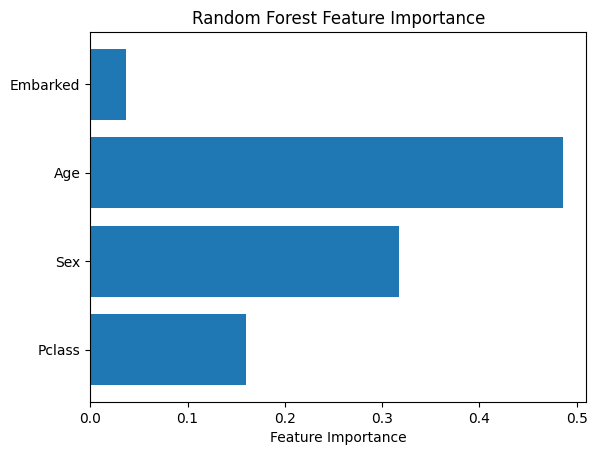

In [8]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


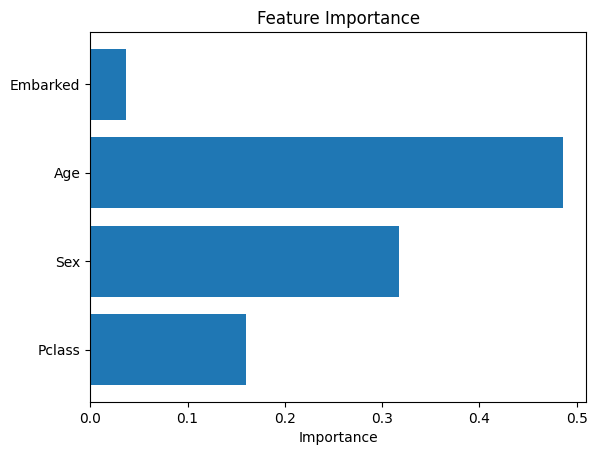

In [9]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


<h1>CONFUSION MATRIX</h1>

<h1> PRACTICAL APPLICATION </h1>
<hr>
<ul>
   <li>Pclass	Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        AGE
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Compton
        </li>
        <li>
             1   - Q -- ueens 
        </li>
         <li>
             2   - S -- South Hampton
        </li>
        </ul>
    
</ul>

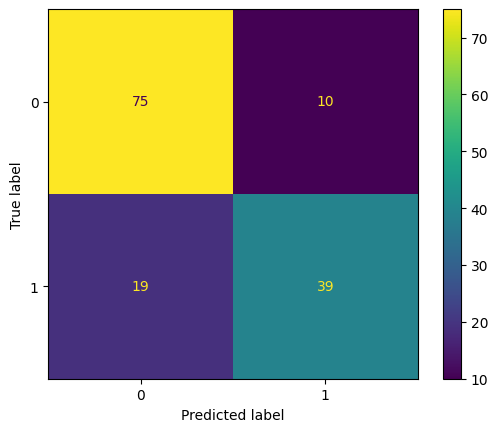

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [11]:
# [Pclass=3, Sex=0 (male), Age=22, Fare=0]
model.predict([[3, 0, 22, 7.25]])

array([0])

In [12]:
passenger = [[3, 0, 30, 7.25]]

prediction = model.predict(passenger)[0]

if prediction == 1:
    print("This passenger has a high likelihood of survival.")
    print("Being in 3rd class and male, other factors may still affect the outcome.")
elif prediction == 0:
    print("This passenger is unlikely to survive.")
    print("Class and demographic factors contributed to a lower survival probability.")
else:
    print("Invalid result")

This passenger is unlikely to survive.
Class and demographic factors contributed to a lower survival probability.


In [13]:
passenger_male = [[1, 0, 10, 80.0]]

prediction_male = model.predict(passenger_male)[0]

if prediction_male == 1:
    print("First-class 10-year-old male is likely to survive.")
else:
    print("First-class 10-year-old male is unlikely to survive.")

First-class 10-year-old male is likely to survive.


In [14]:
df_2 = pd.read_csv("titanic.csv")
df_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
#Useful columns
df_2 = df_2[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

df_2 = df_2.dropna()

In [16]:
df_2["Sex"] = df_2["Sex"].map({"male": 0, "female": 1})
df_2["Embarked"] = df_2["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [17]:
df_2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,2
886,0,2,0,27.0,13.0000,0
887,1,1,1,19.0,30.0000,0
889,1,1,0,26.0,30.0000,1


In [18]:
X = df_2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df_2["Survived"]

In [19]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [20]:
X

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
885,3,1,39.0,29.1250,2
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,0
889,1,0,26.0,30.0000,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
passengers = {
    "Passenger 1 (3rd-class male, 22, S)": [3, 0, 22, 7.25, 0],
    "Passenger 2 (1st-class young female, 28, C)": [1, 1, 28, 120.0, 1],
    "Passenger 3 (2nd-class middle-aged male, 45, Q)": [2, 0, 45, 35.0, 2],
    "Passenger 4 (1st-class child female, 8, S)": [1, 1, 8, 80.0, 0]
}

print("\n--- Logistic Regression Predictions ---")

for desc, features in passengers.items():
    prediction = model.predict([features])[0]
    if prediction == 1:
        print(f"{desc} → Likely to survive")
    else:
        print(f"{desc} → Unlikely to survive")


--- Logistic Regression Predictions ---
Passenger 1 (3rd-class male, 22, S) → Unlikely to survive
Passenger 2 (1st-class young female, 28, C) → Likely to survive
Passenger 3 (2nd-class middle-aged male, 45, Q) → Unlikely to survive
Passenger 4 (1st-class child female, 8, S) → Likely to survive


In [33]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7808988764044944


In [34]:
model.predict([[3, 0, 22, 7.25, 0]])

array([0])

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred_rf = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc:.2f}")

Random Forest Accuracy: 0.80


In [39]:
print("\n--- Random Forest Predictions ---")
for desc, features in passengers.items():
    pred = rf_model.predict([features])[0]
    result = "Likely to survive" if pred == 1 else "Unlikely to survive"
    print(f"{desc} → {result}")


--- Random Forest Predictions ---
Passenger 1 (3rd-class male, 22, S) → Unlikely to survive
Passenger 2 (1st-class young female, 28, C) → Likely to survive
Passenger 3 (2nd-class middle-aged male, 45, Q) → Unlikely to survive
Passenger 4 (1st-class child female, 8, S) → Likely to survive


# Q1: What is the average age of survivors vs non-survivors?

Average Age:
Survived
0    30.626179
1    28.193299
Name: Age, dtype: float64


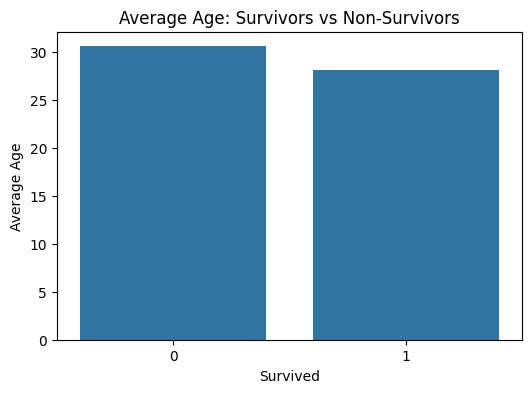

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

q1 = df.groupby("Survived")["Age"].mean()
print("Average Age:")
print(q1)

plt.figure(figsize=(6,4))
sns.barplot(x=q1.index, y=q1.values)
plt.title("Average Age: Survivors vs Non-Survivors")
plt.xlabel("Survived")
plt.ylabel("Average Age")
plt.show()

# Q2: Which passenger class has the highest survival rate?


Survival Rate per Pclass:
Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64


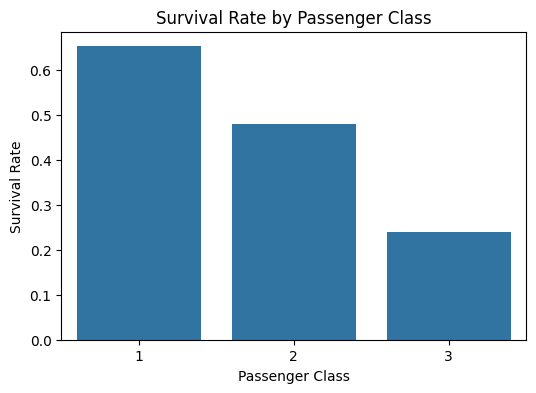

In [42]:
survival_rate = df.groupby("Pclass")["Survived"].mean()
print("\nSurvival Rate per Pclass:")
print(survival_rate)

plt.figure(figsize=(6,4))
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


# Q3: Does sex affect survival probability?


Survival Rate by Sex:
Sex
0    0.205298
1    0.752896
Name: Survived, dtype: float64


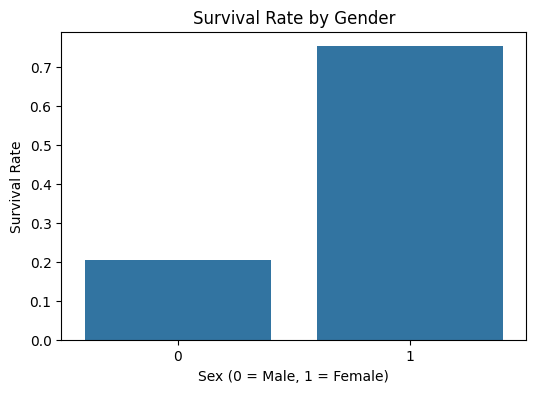

In [43]:
gender_survival = df.groupby("Sex")["Survived"].mean()
print("\nSurvival Rate by Sex:")
print(gender_survival)

plt.figure(figsize=(6,4))
sns.barplot(x=gender_survival.index, y=gender_survival.values)
plt.title("Survival Rate by Gender")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Survival Rate")
plt.show()

# Q4: What is the distribution of passenger ages?

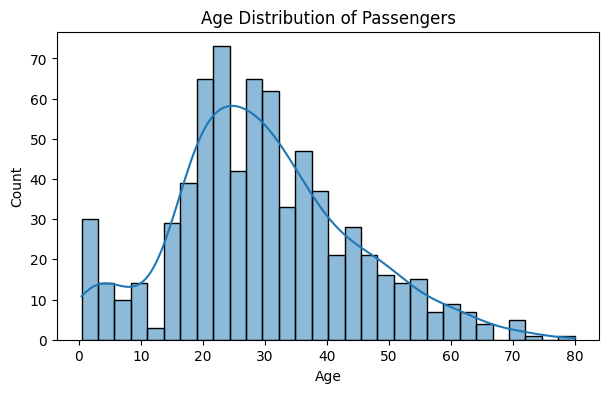

In [44]:
plt.figure(figsize=(7,4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()